In [34]:
from settings import BASE_DIR
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import itertools


In [3]:
image = Image.open(f'{BASE_DIR}/data/pupil/CLASSES_400_300_Part1/C1_S1_I1.tiff')

In [9]:
img = np.asarray(image.convert('L'))


In [10]:
img.shape

(300, 400)

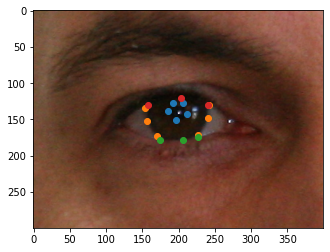

In [30]:
plt.imshow(image)
plt.scatter([197, 186, 192, 206, 212], [151, 139, 128,128, 142])
plt.scatter([227, 240, 242, 170, 156, 154], [172, 148, 130, 173, 152, 134])
plt.scatter([174, 206, 227], [178, 178, 174])
plt.scatter([158, 204, 241], [130, 120, 130])

In [35]:
def find_circle(points):
    m = []

    for point in points:
        x = point[0]
        y = point[1]
        m.append([x**2 + y**2, x, y, 1])

    m = np.asmatrix(m)

    m11d = np.linalg.det(m[:, 1:])
    m12d = np.linalg.det(m[:, [0, 2, 3]])
    m13d = np.linalg.det(m[:, [0, 1, 3]])
    m14d = np.linalg.det(m[:, :3])

    xc = 0.5 * m12d / m11d
    yc = -0.5 * m13d / m11d
    r = np.sqrt(xc**2 + yc**2 + m14d / m11d)

    return xc, yc, r


def find_mean_circle(points):

    combinations = itertools.combinations(points, 3)

    xcs = []
    ycs = []
    rs = []

    for points_ in combinations:
        xc, yc, r = find_circle(points_)
        xcs.append(xc)
        ycs.append(yc)
        rs.append(r)

    xc = np.mean(xcs)
    yc = np.mean(ycs)
    r = np.mean(rs)

    return xc, yc, r

In [42]:
iris_coords = [[197, 151], [186, 139], [192, 128], [206, 128], [212, 142]]
pupil_coords = [[227, 172], [240, 148], [242, 130], [170, 173], [156, 152], [154, 134]]
xc_i, yc_i, r_i = find_mean_circle(iris_coords)
xc_p, yc_p, r_p = find_mean_circle(pupil_coords)

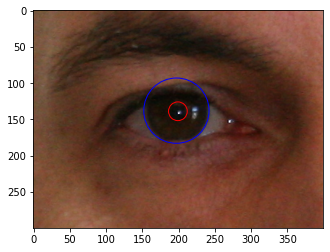

In [43]:
plt.imshow(image)
plt.gca().add_patch(plt.Circle((xc_i, yc_i), r_i, color='r', fill=False))
plt.gca().add_patch(plt.Circle((xc_p, yc_p), r_p, color='blue', fill=False))

In [45]:
xc_i, xc_p


(199.13135194146392, 197.08527531496847)